In [1]:
!pip install yfinance
!pip install yahoofinancials
!pip install matplotlib


     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 11.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=c505d2c1d72910b390c594b7e574cb32acb83040bfa60eb08906fa4ae8a1892a
  Stored in directory: /root/.cache/pip/wheels/4

In [2]:
import yfinance as yf
import yahoofinancials
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

In [3]:
stocks = ['CIPLA.NS','TATAMOTORS.NS','HDFCBANK.NS','MUTHOOTFIN.NS', 'ASIANPAINT.NS']

In [4]:
data = []
for t in stocks:
  data.append(yf.download(t, 
                      start='2015-04-01', 
                      end='2017-03-31'
                      ))
data = pd.concat([data[0]['Adj Close'], data[1]['Adj Close'], data[2]['Adj Close'], data[3]['Adj Close'], data[4]['Adj Close']], axis=1)
data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,
2015-04-01,689.644409,558.678955,495.678497,176.339066,783.949951
2015-04-06,714.961853,567.920044,495.054810,173.923492,786.621399
2015-04-07,707.721375,560.123108,495.438599,176.123413,796.829834
2015-04-08,715.982239,561.272705,496.781830,174.527374,807.944519
2015-04-09,699.217407,559.673340,506.640198,171.896088,813.955139
...,...,...,...,...,...
2017-03-24,580.866638,470.399994,694.086182,316.264557,1031.905029
2017-03-27,579.057373,464.750000,687.020325,316.174255,1011.203857
2017-03-28,581.062256,472.399994,692.063904,316.941895,1025.699585


In [5]:
log_returns = np.log(data/data.shift())
log_returns


,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN
2015-04-06,0.036053,0.016406,-0.001259,-0.013793,0.003402
2015-04-07,-0.010179,-0.013824,0.000775,0.012569,0.012894
2015-04-08,0.011605,0.002050,0.002708,-0.009103,0.013852
2015-04-09,-0.023694,-0.002854,0.019650,-0.015191,0.007412
...,...,...,...,...,...
2017-03-24,-0.003865,-0.005301,-0.004588,-0.009521,0.002493
2017-03-27,-0.003120,-0.012084,-0.010232,-0.000286,-0.020265
2017-03-28,0.003456,0.016326,0.007314,0.002425,0.014233


In [6]:
n = 5000
 
weights = np.zeros((n, 5))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)


In [7]:
for i in range(n):
    weight = np.random.random(5)
    weight /= weight.sum()
    weights[i] = weight
     
    exp_rtns[i] = np.sum((log_returns.mean())*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

 

In [8]:
sharpe_ratios

array([0.5916862 , 0.69482452, 0.28409953, ..., 0.93236558, 0.54519688,
       1.02219335])

In [9]:
exp_vols

array([0.19680007, 0.20786405, 0.21112192, ..., 0.16476983, 0.21965041,
       0.18010932])

In [10]:
exp_rtns

array([0.11644388, 0.14442904, 0.05997964, ..., 0.15362572, 0.11975272,
       0.18410655])

Text(0, 0.5, 'Expected Return')

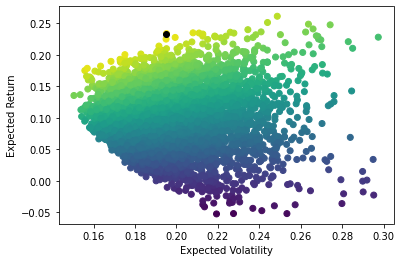

In [11]:
plt.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
plt.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='k')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')